<a href="https://colab.research.google.com/github/lunayee/note/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

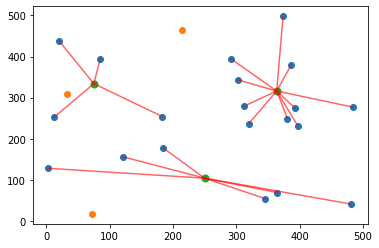

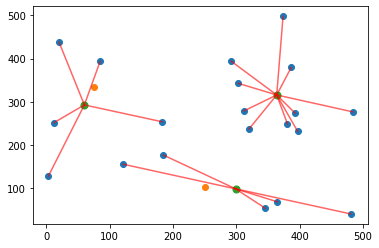

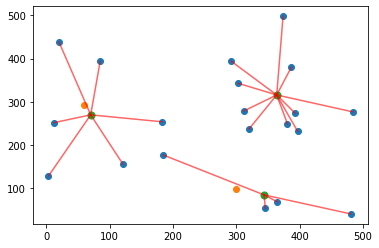

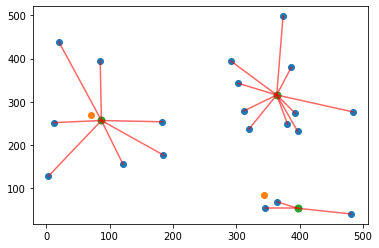

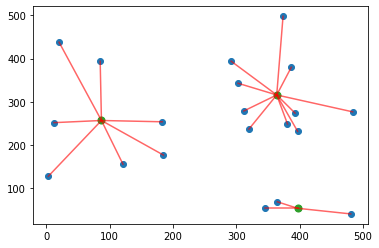

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 群集中心和元素的數量
seed_num = 3
dot_num = 20

# 初始元素
x = np.random.randint(0, 500, dot_num)
y = np.random.randint(0, 500, dot_num)
# 初始群集中心
kx = np.random.randint(0, 500, seed_num)
ky = np.random.randint(0, 500, seed_num)


# 兩點之間的距離
def dis(x, y, kx, ky):
    return int(((kx-x)**2 + (ky-y)**2)**0.5)

# 對每筆元素進行分群
def cluster(x, k, kx, ky):
    team = []
    for i in range(3):
        team.append([])
    mid_dis = 99999999
    for i in range(dot_num):
        for j in range(seed_num):
            distant = dis(x[i], y[i], kx[j], ky[j])
            if distant < mid_dis:
                mid_dis = distant
                flag = j
        team[flag].append([x[i], y[i]])
        mid_dis = 99999999
    return team

# 對分群完的元素找出新的群集中心
def re_seed(team, kx, ky):
    sumx = 0
    sumy = 0
    new_seed = []
    for index, nodes in enumerate(team):
        if nodes == []:
            new_seed.append([kx[index], ky[index]])
        for node in nodes:
            sumx += node[0]
            sumy += node[1]
        new_seed.append([int(sumx/len(nodes)), int(sumy/len(nodes))])
        sumx = 0
        sumy = 0
    nkx = []
    nky = []
    for i in new_seed:
        nkx.append(i[0])
        nky.append(i[1])
    return nkx, nky

# k-means 分群
def kmeans(x, y, kx, ky, fig):
    team = cluster(x, y, kx, ky)
    nkx, nky = re_seed(team, kx, ky)
    
    # plot: nodes connect to seeds
    cx = []
    cy = []
    line = plt.gca()
    for index, nodes in enumerate(team):
        for node in nodes:
            cx.append([node[0], nkx[index]])
            cy.append([node[1], nky[index]])
        for i in range(len(cx)):
            line.plot(cx[i], cy[i], color='r', alpha=0.6)
        cx = []
        cy = []
    
    # 繪圖
    feature = plt.scatter(x, y)
    k_feature = plt.scatter(kx, ky)
    nk_feaure = plt.scatter(np.array(nkx), np.array(nky), s=50)
    plt.show()

    # 判斷群集中心是否不再更動
    if nkx == list(kx) and nky == (ky):
        return
    else:
        fig += 1
        kmeans(x, y, nkx, nky, fig)


kmeans(x, y, kx, ky, fig=0)
